# Correlation and Least Squares Regression

## Correlation

In [8]:
import numpy as np
from scipy.stats import linregress
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503,
               0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41,
               1.72, 2.03, 2.02, 2.02, 2.02])

Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0,
               93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3,
               840.0, 801.0, 519.0])

N = 24

In [9]:
def compute_utility(Xs, Ys):
    X_mean, Y_mean = Xs.mean(), Ys.mean()
    print("Mean of X is", X_mean)
    print("Mean of Y is", Y_mean)


    s_XY_square = 0
    s_X_square = 0
    s_Y_square = 0


    for i in range(N):
        s_XY_square += (Xs[i]-X_mean) * (Ys[i]-Y_mean)
        s_X_square += (Xs[i]-X_mean)**2
        s_Y_square += (Ys[i]-Y_mean)**2

    s_XY_square /= (N-1)
    s_X_square /= (N-1)
    s_Y_square /= (N-1)

    r_XY = s_XY_square/np.sqrt(s_X_square* s_Y_square)
    print(f'The correlation between X and Y is {r_XY:.3f}')


    slope, intercept, r, p, se = linregress(Xs, Ys)
    print(f'The slope is {slope:.3f} and the intercept is {intercept:.3f}')

    plt.plot(Xs, Ys, 'o', label='original data')
    plt.plot(Xs, intercept + slope * Xs, 'r', label='fitted line')
    plt.legend()
    plt.show()

Mean of X is 0.9199250000000001
Mean of Y is 425.6175
The correlation between X and Y is 0.839
The slope is 447.871 and the intercept is 13.610


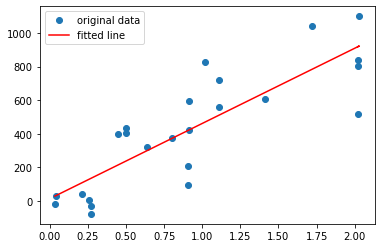

In [10]:
compute_utility(Xs, Ys)

#### Correcting simple nonlinear relationships

In [11]:
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])

Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])

N = 9

Mean of X is 11.907777777777776
Mean of Y is 60.23733333333333
The correlation between X and Y is 0.989
The slope is 6.109 and the intercept is -12.504


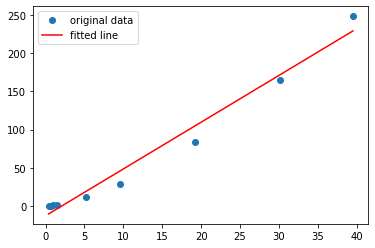

In [12]:
compute_utility(Xs, Ys)


C:\Users\herit\anaconda3\envs\6.419x Statistical Modeling and Computation in Applications\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


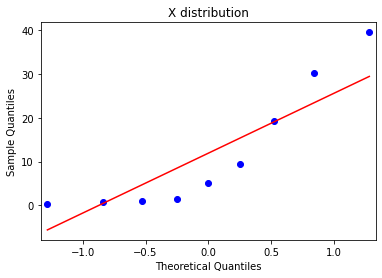

In [13]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
sm.qqplot(Xs, line='s')
plt.title("X distribution")
plt.show()


Mean of X is 1.4538802139806306
Mean of Y is 2.181477789171877
The correlation between X and Y is 1.000
The slope is 1.500 and the intercept is 0.001


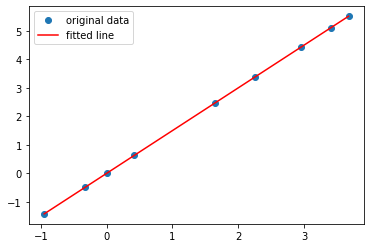

In [18]:
compute_utility(np.log(Xs), np.log(Ys))

## Multiple Linear regression


In [20]:
LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])

LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])

LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])

StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])

LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])

LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

N = 30

In [32]:
y = LogPlanetMass
X = np.transpose(np.vstack((LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge)))
X = np.insert(X, 0, values=1, axis=1) # Insert a column of ones


beta = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta)

[ 0.15379303  1.40214538 -0.14099818 -1.59951364 -0.95610919 -0.46176234]


array([-0.18374791,  0.51755089,  0.49334404,  0.44052872,  0.17831981,
       -0.66829645, -0.16403212,  0.23102284,  0.42131224,  0.5167284 ,
        0.64745139, -0.18481093, -0.96270888,  0.37877132,  0.68902688,
       -2.16677271,  1.01094062, -0.04181651, -2.02822579,  0.50567069,
       -4.11704531, -0.58623444, -1.87784597, -0.05926116, -0.91972647,
        0.25363892, -3.46156701, -0.06219871, -3.90113623,  0.561237  ])

## Model Selection and Regularization


In [33]:
def T_stat(X, y, j):

    N, p = X.shape
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    beta_j = beta[j]
    sigma_hat =  np.sum((X @ beta - y) ** 2) / (N-p)
    Covmat = np.linalg.inv(X.T @ X)

    return beta_j / (sigma_hat * Covmat[j,j])

In [36]:
for var_ix in range(5):
    print(T_stat(X, y, var_ix))

0.07971432579004219
17.08604737324358
-1.089211144840306
-1.0227861762192076
-0.7663959528252973
